## Introduction

Car accidents happen each year. Some people died, while others survived. We wonder why people die or survive, so we are going to examine the factors influencing severity of the car accidents.

## Data
I gained this data set from the Seattle Police Department.There are more than 190,000 records with 38 variables over the past 15 years.

## Methodology
First, I will import the libraries  because it is very handy to use anytime. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import reS
from collections import Counter
from statistics import mode
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor


After reading the dataset, I have observed many non-values in this data frame. Thus, I want to clean the dataset to obtain a better result for analysis.

In [30]:
df=pd.read_csv("Data-Collisions.csv")
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [31]:
df.isnull().mean().sort_values(ascending=False)

PEDROWNOTGRNT     0.976026
EXCEPTRSNDESC     0.971039
SPEEDING          0.952058
INATTENTIONIND    0.846897
INTKEY            0.665747
EXCEPTRSNCODE     0.564341
SDOTCOLNUM        0.409595
JUNCTIONTYPE      0.032511
Y                 0.027400
X                 0.027400
LIGHTCOND         0.026557
WEATHER           0.026100
ROADCOND          0.025746
ST_COLDESC        0.025191
COLLISIONTYPE     0.025191
UNDERINFL         0.025088
LOCATION          0.013751
ADDRTYPE          0.009894
ST_COLCODE        0.000092
INCKEY            0.000000
STATUS            0.000000
REPORTNO          0.000000
COLDETKEY         0.000000
OBJECTID          0.000000
HITPARKEDCAR      0.000000
PEDCYLCOUNT       0.000000
SEVERITYCODE.1    0.000000
SEVERITYDESC      0.000000
PERSONCOUNT       0.000000
PEDCOUNT          0.000000
CROSSWALKKEY      0.000000
VEHCOUNT          0.000000
INCDATE           0.000000
INCDTTM           0.000000
SDOT_COLCODE      0.000000
SDOT_COLDESC      0.000000
SEGLANEKEY        0.000000
S

Basaed on the data above, I drop variables with too many missing values such as PEDROWNOTGRNT; meanwhile, I also delete columns
that won't directly influence the severity of a car accident.

In [32]:
df.drop(['PEDROWNOTGRNT'], axis=1, inplace=True)
df.drop(['EXCEPTRSNDESC'], axis=1, inplace=True)
df.drop(['SPEEDING'], axis=1, inplace=True)
df.drop(['INATTENTIONIND'], axis=1, inplace=True)
df.drop(['INTKEY'], axis=1, inplace=True)
df.drop(['EXCEPTRSNCODE'], axis=1, inplace=True)
df.drop(['SDOTCOLNUM'], axis=1, inplace=True)
df.drop(['SEVERITYCODE.1'], axis=1, inplace=True)
df.drop(['X'], axis=1, inplace=True)
df.drop(['Y'], axis=1, inplace=True)
df.drop(['LOCATION'], axis=1, inplace=True)
df.drop(['REPORTNO'], axis=1, inplace=True)
df.drop(['ST_COLDESC'], axis=1, inplace=True)
df.drop(['COLDETKEY'], axis=1, inplace=True)
df.drop(['OBJECTID'], axis=1, inplace=True)
df.drop(['INCDATE'], axis=1, inplace=True)
df.drop(['INCDTTM'], axis=1, inplace=True)



Now, I have a clean dataset! However, I do realize that too many categorical values appear in the table. They will stop me from further analysis, and I therefore have to decode them.

In [6]:
df

,SEVERITYCODE,INCKEY,STATUS,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,SDOT_COLCODE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,1307,Matched,Intersection,Injury Collision,Angles,2,0,0,2,...,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Wet,Daylight,10,0,0,N
1,1,52200,Matched,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,...,16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,Raining,Wet,Dark - Street Lights On,11,0,0,N
2,1,26700,Matched,Block,Property Damage Only Collision,Parked Car,4,0,0,3,...,14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Overcast,Dry,Daylight,32,0,0,N
3,1,1144,Matched,Block,Property Damage Only Collision,Other,3,0,0,3,...,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,23,0,0,N
4,2,17700,Matched,Intersection,Injury Collision,Angles,2,0,0,2,...,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,10,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,309534,Matched,Block,Injury Collision,Head On,3,0,0,2,...,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,24,0,0,N
194669,1,309085,Matched,Block,Property Damage Only Collision,Rear Ended,2,0,0,2,...,14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",N,Raining,Wet,Daylight,13,0,0,N
194670,2,311280,Matched,Intersection,Injury Collision,Left Turn,3,0,0,2,...,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,28,0,0,N
194671,2,309514,Matched,Intersection,Injury Collision,Cycles,2,0,1,1,...,51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,N,Clear,Dry,Dusk,5,4308,0,N


In [7]:
df.dtypes

SEVERITYCODE      int64
INCKEY            int64
STATUS           object
ADDRTYPE         object
SEVERITYDESC     object
COLLISIONTYPE    object
PERSONCOUNT       int64
PEDCOUNT          int64
PEDCYLCOUNT       int64
VEHCOUNT          int64
JUNCTIONTYPE     object
SDOT_COLCODE      int64
SDOT_COLDESC     object
UNDERINFL        object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
ST_COLCODE       object
SEGLANEKEY        int64
CROSSWALKKEY      int64
HITPARKEDCAR     object
dtype: object

Before diving into decoding, I have to make sure one isn't on the table, so I can do it well.

In [23]:
df=df.dropna()

In [24]:
df

,SEVERITYCODE,INCKEY,STATUS,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,SDOT_COLCODE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,1307,0,2,0,0,2,0,0,2,...,11,14,2,4,8,5,10,0,0,0
1,1,52200,0,1,1,9,2,0,0,2,...,16,16,0,6,8,2,11,0,0,0
2,1,26700,0,1,1,5,4,0,0,3,...,14,17,0,4,0,5,32,0,0,0
3,1,1144,0,1,1,4,3,0,0,3,...,11,14,2,1,0,5,23,0,0,0
4,2,17700,0,2,0,0,2,0,0,2,...,11,14,0,6,8,5,10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,309534,0,1,0,2,3,0,0,2,...,11,14,2,1,0,5,24,0,0,0
194669,1,309085,0,1,1,7,2,0,0,2,...,14,17,2,6,8,5,13,0,0,0
194670,2,311280,0,2,0,3,3,0,0,2,...,11,14,2,1,0,5,28,0,0,0
194671,2,309514,0,2,0,1,2,0,1,1,...,51,29,2,1,0,6,5,4308,0,0


In [25]:
label = LabelEncoder()

In [26]:
for col in ["STATUS","ADDRTYPE","SEVERITYDESC","COLLISIONTYPE","JUNCTIONTYPE","UNDERINFL","WEATHER","LIGHTCOND"]:
    df[col] = label.fit_transform(df[col])

In [27]:
for col in ["ROADCOND"]:
    df[col] = label.fit_transform(df[col])

In [28]:
for col in ["SDOT_COLDESC"]:
    df[col] = label.fit_transform(df[col])

In [29]:
for col in ["HITPARKEDCAR"]:
    df[col] = label.fit_transform(df[col])

As you can see now, we have a beautiful table below. Let's use a heatmap to see the influential variables for the severity of a car accident.

In [18]:
df

,SEVERITYCODE,INCKEY,STATUS,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,SDOT_COLCODE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,1307,0,2,0,0,2,0,0,2,...,11,14,2,4,8,5,10,0,0,0
1,1,52200,0,1,1,9,2,0,0,2,...,16,16,0,6,8,2,11,0,0,0
2,1,26700,0,1,1,5,4,0,0,3,...,14,17,0,4,0,5,32,0,0,0
3,1,1144,0,1,1,4,3,0,0,3,...,11,14,2,1,0,5,23,0,0,0
4,2,17700,0,2,0,0,2,0,0,2,...,11,14,0,6,8,5,10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,309534,0,1,0,2,3,0,0,2,...,11,14,2,1,0,5,24,0,0,0
194669,1,309085,0,1,1,7,2,0,0,2,...,14,17,2,6,8,5,13,0,0,0
194670,2,311280,0,2,0,3,3,0,0,2,...,11,14,2,1,0,5,28,0,0,0
194671,2,309514,0,2,0,1,2,0,1,1,...,51,29,2,1,0,6,5,4308,0,0


## Result
It turns out that there is no significant relationship between those variables and the severity of a car accident.

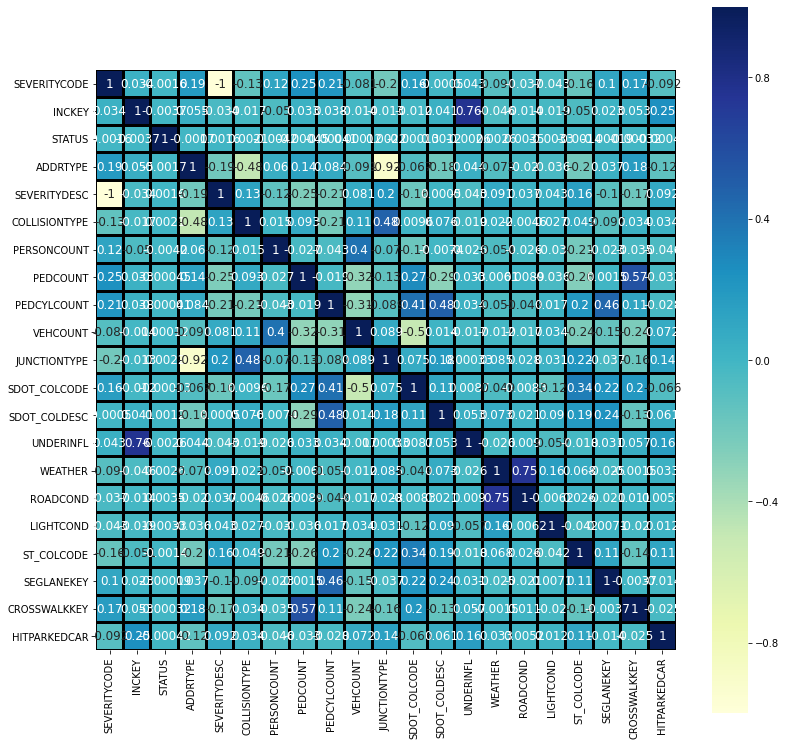

In [19]:
fig, axs = plt.subplots(nrows=1, figsize=(13, 13))
sns.heatmap(df.corr(), annot=True, square=True, cmap='YlGnBu', linewidths=2, linecolor='black', annot_kws={'size':12})

## Discussion

You must be very confused when reading my results but I was confused, too. I think three possible reasons lead to this situations.
1.Other factors excluded
Since we got this data as default, we are not sure why policies collected this kind of information. Possibly, they want to record what happened at the scene but not try to figure out the reason behind it. Hence, those variables are created to record what happened. On the contrary, before producing the columns, we will perform qualitative analysis first to gain better insight as a researcher. It allows us to ask people the right questions which are relevant to the severity of a car accident. In brief, some vital variables might be missing. 
2.Without further inversitgation on available dataset
Throughout the analysis above, you will notice that I follow the standard steps to analyze data. One more thing I can improve my analytical performance is to undergo feature engineering. For example, time factors may be valuable variables because I can obtain two more columns like weekday/weekend and night/morning. However, I don't possess domain knowledge toward a car accident which means it can take me a while and effort to gain a decent result. As a result, I didn't do it.
3.The confusing severirycode
The data of severitycode doesn't specify the meaning. What does 1 and 2 mean? or little injury? With the vague definition of the severitycode, it will impact the relationship between independent and dependent variables. We all know a car accident leads to a different level of injury. In this case, severitycode should have a wide range of levels to match its correspondent variables. The available two features, 1 and 2, don't seem to fit the reality.

## Conclusion
There is no notable relationship between severitycode and other variables. Nonetheless, I have obeserved an interesting phenomenon through graphs. For instance, intersections are the most common accident areas. As for weather, overcast causes the most accidents. Also, many accidents take place while the road are wet.

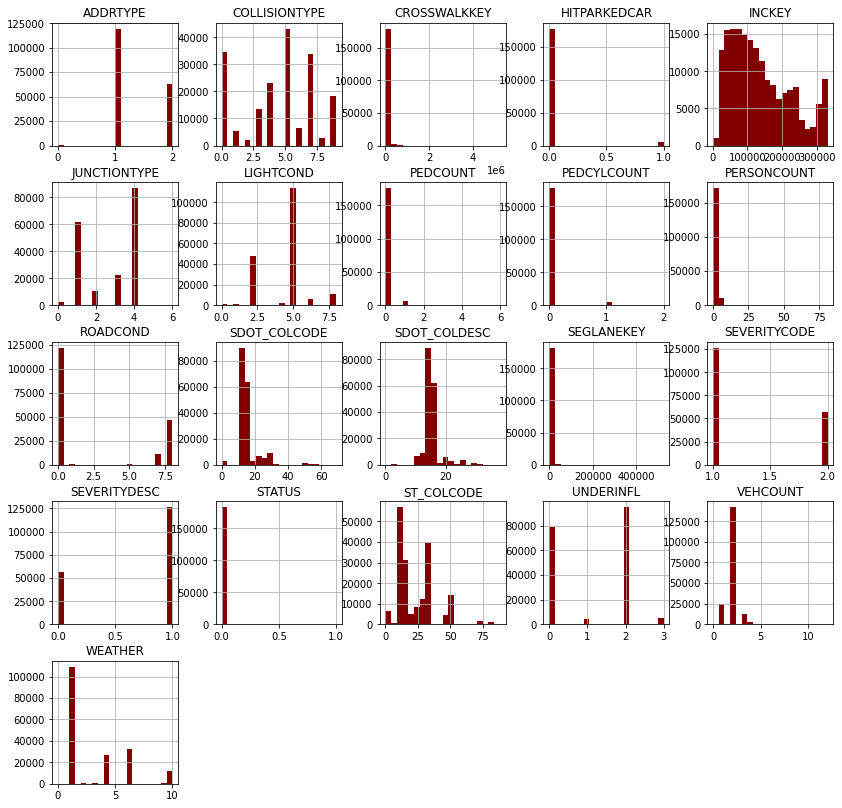

In [20]:
df.hist(figsize=(14,14), color='maroon', bins=20)
plt.show()